Problem 1. Suppose $U$ is nxm with n≥m and $U^TU=I$. Let $b$ be any vector in $\Re^n$ and we compute the projection $Pb=U\hat{x}$. What is $\hat{x}$ in terms of $U$ and $b$?

Problem 2.  Show that $\|\hat{x}\| = \|U\hat{x}\|$ in the problem above, where $\|a\|$ is defined as $\sqrt{a^Ta}$.

Problem 3. (Extension of GS p. 216 Problem 11a)

Let $A = \begin{pmatrix} 1 & 1\\ 0 & 1\\ 0 & 0 \end{pmatrix}$ and $b =\begin{pmatrix} 2 \\ 3 \\ 4 \end{pmatrix}$.

3a) Compute the projection of b onto the column space of $A$ by hand calculation:

3b) Check your answer by using Julia to compute $(A^T A)^{-1}(A^Tb)$. What do you observe?

In [ ]:
A = [1 1 ;0 1; 0 0]
b = [2, 3, 4]
(A'A)\(A'b)

3c) Check your answer by typing $A\b$. What do you observe?

In [ ]:
A\b

3d) Find $A \hat{x}=p$ using the svd and compare with the standard approach. What do you observe?

In [ ]:
U,s,V = svd(A)
[U*U'b A*inv(A'A)*A'b]

3e) Also compare the values in problem 2 above.  What do you observe?

In [ ]:
x̂ = A\b
norm(x̂),norm(U*x̂)

4)  Using Julia, find the best fit parabola through four random points:

In [ ]:
x = sort(rand(4))
y = sort(rand(4))

In [ ]:
A = [ones(x) x x.^2]
? \ ?  # Fill in the question marks and interpret briefly the answer)

5) Using Julia and the same points as in problem 4, find the best fit curve of the form
$y = C*sin(x) + D*e^x + E*x$ through the four points.

Note: If x is a vector, sin.(x) and e.^x may be useful constructs for the elementwise evaluation of the functions.

6) In this problem we explore how to let data define the subspace using the SVD. We will use an often used data set known as the [MNIST data base](https://en.wikipedia.org/wiki/MNIST_database) for character recognition. 

Some of you are good coders and may want to understand the code below.  That is not required of 18.06.  Those of you who prefer not to look at code, there is no need.  What we want most is for you to see the idea below.  We will in very few lines of code, completely from scratch write a character recognition machine learning code.  We'd like you to understand the idea of how it works, not the code.

(Credit to Raj Rao, University of Michigan.)

In [ ]:
using Flux, Flux.Data.MNIST, Images

Grab 60000 images of handwritten digits

In [ ]:
imgs = MNIST.images()
labels = MNIST.labels()
size(imgs)

Let's look at the first 24 (you can look at more if you like)

,,,,,,
,,,,,,
,,,,,,

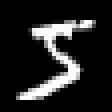
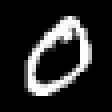
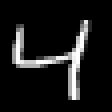
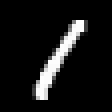
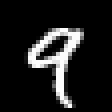
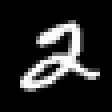
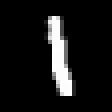
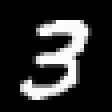
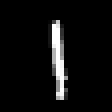
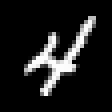
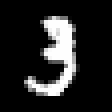
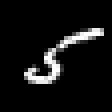
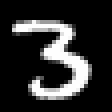
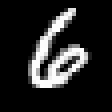
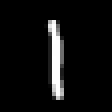
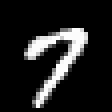
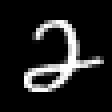
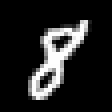
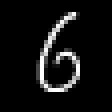
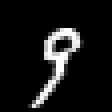
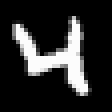

In [13]:
reshape(imgs[1:21],7,3)  # Not sure why this is 7x3 and not 3x7, but whatever

Here are the numerical labels of the same data

In [14]:
labels[1:21]'

1×21 RowVector{Int64,Array{Int64,1}}:
 5  0  4  1  9  2  1  3  1  4  3  5  3  6  1  7  2  8  6  9  4

In [ ]:
size(imgs[1]) # Each image is a 28x28=784  matrix of "gray scale" numbers from 0 to 1

Reorganize the data as one big 784x60000 matrix labeled D.
Each column is a 28x28 image flattened, and we have 60000 images.

In [ ]:
D =  hcat([vec(Float64.(i)) for i in imgs]...) 
size(D)

For each of the digits 1,2,...,9,0 we find 500 images to train with.  (500 is arbitrary) <br>
Each training set becomes a 784x500 matrix.  training_data is a vector of ten such matrices.

In [ ]:
training_size = 500
training_data = [ D[:,find(labels.== (i%10))[1:training_size]] for i=1:10]; # Find training images for each digit
size(training_data[1])

We compute the $U$ in the SVD of each of the above ten matrices of size 784 x 500, and
take the first 50 columns as the basis of a subspace to project onto. u is a vector of ten matrices $U$
one for each digit. (50 is arbitrary).  (This could have been a 784x500x3 array, but a 10 vector of 784x500
matrices seemed more convenient.)

In [ ]:
singular_vec_size  =  50
u = [svdfact(training_data[i])[:U][:,1:singular_vec_size] for i=1:10];

Now we use each of the 10 U's to get 10 xhats, and see which has the greatest norm.  That is how we will recognize digits.  Note that having the largest xhat means, the smallest error.

In [ ]:
results = zeros(60000)
for j = 1:60000
   xhats = [ norm(u[i]'D[:,j]) for i=1:10]
   results[j] = rem(findmax(xhats)[2],10)
end


How well does this work?  nearly a 95% success rate!  Pretty cool huh?  

In [15]:
mean( results .== labels)

0.9463166666666667

Write in your own words an explanation of what we just did in terms of projecting onto ten data defined subspaces.

Problem 7. In the above the columns of u[1] is a basis for the the ones digit, and the columns of u[2] is a basis for the twos digit.  Are the column spaces of u[1] and u[2] orthogonal subspaces? You can use Julia to test.

Problem 8.  GS p. 231.

What condition on ($t_1,b_1$),($t_2,b_2$),($t_3,b_3$) puts three points on  a straight line?  A column space answer has $(b_1,b_2,b_3)$ being a linear combination of $(1,1,1)$ and $(t_1,t_2,t_3)$.  How simple an answer can you get?

In [ ]:
? \